In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Korea Income and Welfare.csv')

In [3]:
for col in df.columns:
    # Replace invalid or NaN values with the column mean
    if df[col].dtype in [np.int64, np.float64]:  # Ensure the column is numeric
        df[col] = df[col].fillna(df[col].mean())

In [4]:
df.dtypes

id                      int64
year                    int64
wave                    int64
region                  int64
income                float64
family_member           int64
gender                  int64
year_born               int64
education_level         int64
marriage                int64
religion                int64
occupation             object
company_size           object
reason_none_worker     object
dtype: object

In [5]:
avg_income = df['income'].mean()


In [6]:
avg_income

3441.1223268686776

In [7]:
df['above_avg_income'] = df['income'] >= avg_income
# Drop non-predictive columns
X = df.drop(columns=["id", "income", 'above_avg_income'])

# One-hot encode categorical columns
categorical_cols = ['gender', 'region', 'education_level', 'marriage', 'religion', 'occupation', 'company_size', 'reason_none_worker', 'wave', 'family_member']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# Target variable
y = df['above_avg_income']

# Check the shapes to ensure consistency
print(X.shape)  # Should have the same number of rows as y
print(y.shape)

(92857, 324)
(92857,)


In [8]:
# One-hot encode categorical variables
X = pd.get_dummies(categorical_cols, drop_first=False)


In [9]:
X.head(2)

,company_size,education_level,family_member,gender,marriage,occupation,reason_none_worker,region,religion,wave
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [10, 92857]

In [12]:
print(X.shape)  # Should return (number_of_samples, number_of_features)
print(y.shape)  # Should return (number_of_samples,)


(5, 5)
(92857,)


In [13]:

# Train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

C:\Users\steve\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [21]:
for d, j in zip(X_test.dtypes, X_test.columns):
    print(f"Column: {j}, Data Type: {d}")


Column: year, Data Type: int64
Column: wave, Data Type: int64
Column: region, Data Type: int64
Column: family_member, Data Type: int64
Column: gender, Data Type: int64
Column: year_born, Data Type: int64
Column: education_level, Data Type: int64
Column: marriage, Data Type: int64
Column: religion, Data Type: int64
Column: occupation_ , Data Type: bool
Column: occupation_1001, Data Type: bool
Column: occupation_1002, Data Type: bool
Column: occupation_1009, Data Type: bool
Column: occupation_1011, Data Type: bool
Column: occupation_1012, Data Type: bool
Column: occupation_111, Data Type: bool
Column: occupation_112, Data Type: bool
Column: occupation_113, Data Type: bool
Column: occupation_12, Data Type: bool
Column: occupation_120, Data Type: bool
Column: occupation_121, Data Type: bool
Column: occupation_122, Data Type: bool
Column: occupation_131, Data Type: bool
Column: occupation_132, Data Type: bool
Column: occupation_133, Data Type: bool
Column: occupation_134, Data Type: bool
Co

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.3f}")


Overall Accuracy: 0.840


In [15]:
[col for col in X_test]

['year',
 'wave',
 'region',
 'family_member',
 'gender',
 'year_born',
 'education_level',
 'marriage',
 'religion',
 'occupation_ ',
 'occupation_1001',
 'occupation_1002',
 'occupation_1009',
 'occupation_1011',
 'occupation_1012',
 'occupation_111',
 'occupation_112',
 'occupation_113',
 'occupation_12',
 'occupation_120',
 'occupation_121',
 'occupation_122',
 'occupation_131',
 'occupation_132',
 'occupation_133',
 'occupation_134',
 'occupation_135',
 'occupation_139',
 'occupation_141',
 'occupation_142',
 'occupation_143',
 'occupation_144',
 'occupation_145',
 'occupation_149',
 'occupation_151',
 'occupation_152',
 'occupation_153',
 'occupation_154',
 'occupation_156',
 'occupation_157',
 'occupation_159',
 'occupation_161',
 'occupation_162',
 'occupation_163',
 'occupation_164',
 'occupation_165',
 'occupation_171',
 'occupation_172',
 'occupation_173',
 'occupation_182',
 'occupation_183',
 'occupation_184',
 'occupation_21',
 'occupation_211',
 'occupation_212',
 'occup

In [16]:
# Filter male and female entries
X_test_male = X_test[X_test['gender'] == 1]
y_test_male = y_test[X_test['gender'] == 1]


X_test_female = X_test[X_test['gender'] == 2]
y_test_female = y_test[X_test['gender'] == 2]

# Get accuracy for each gender group
y_pred_male = model.predict(X_test_male)
accuracy_male = accuracy_score(y_test_male, y_pred_male)
print(f"Accuracy for Male: {accuracy_male:.3f}")

y_pred_female = model.predict(X_test_female)
accuracy_female = accuracy_score(y_test_female, y_pred_female)
print(f"Accuracy for Female: {accuracy_female:.3f}")


Accuracy for Male: 0.810
Accuracy for Female: 0.912


In [ ]:

y_pred_male_proba = model.predict_proba(X_test_male)[:, 1]
roc_auc_male = roc_auc_score(y_test_male, y_pred_male_proba)
print(f"ROC AUC for Male: {roc_auc_male:.3f}")

y_pred_female_proba = model.predict_proba(X_test_female)[:, 1]
roc_auc_female = roc_auc_score(y_test_female, y_pred_female_proba)
print(f"ROC AUC for Female: {roc_auc_female:.3f}")


ROC AUC for Male: 0.895
ROC AUC for Female: 0.897


In [ ]:

# For Male
y_pred_male = model.predict(X_test_male)
precision_male = precision_score(y_test_male, y_pred_male)
recall_male = recall_score(y_test_male, y_pred_male)
f1_male = f1_score(y_test_male, y_pred_male)

# For Female
y_pred_female = model.predict(X_test_female)
precision_female = precision_score(y_test_female, y_pred_female)
recall_female = recall_score(y_test_female, y_pred_female)
f1_female = f1_score(y_test_female, y_pred_female)

print(f"Male Precision: {precision_male:.3f}, Recall: {recall_male:.3f}, F1-Score: {f1_male:.3f}")
print(f"Female Precision: {precision_female:.3f}, Recall: {recall_female:.3f}, F1-Score: {f1_female:.3f}")


Male Precision: 0.809, Recall: 0.795, F1-Score: 0.802
Female Precision: 0.621, Recall: 0.336, F1-Score: 0.437


In [14]:
X_test.columns

Index(['year', 'wave', 'region', 'family_member', 'gender', 'year_born',
       'education_level', 'marriage', 'religion', 'occupation_ ',
       ...
       'reason_none_worker_11', 'reason_none_worker_2', 'reason_none_worker_3',
       'reason_none_worker_4', 'reason_none_worker_5', 'reason_none_worker_6',
       'reason_none_worker_7', 'reason_none_worker_8', 'reason_none_worker_9',
       'reason_none_worker_99'],
      dtype='object', length=280)

Equalized odds difference and demographic parity difference based on Gender!

In [ ]:
equalized_odds_difference(
    y_true = y_test,
    y_pred =y_pred,
    sensitive_features= X_test['gender']
)

0.45819718727848596

In [ ]:
demographic_parity_difference(
    y_true = y_test,
    y_pred = y_pred,
    sensitive_features= X_test['gender']
)

0.41984444540550464

Equalized odds difference and demographic parity difference based on Religion!

In [ ]:
equalized_odds_difference(
    y_true = y_test,
    y_pred =y_pred,
    sensitive_features= X_test['religion']
)

0.39897558849171755

In [ ]:
demographic_parity_difference(
    y_true = y_test,
    y_pred = y_pred,
    sensitive_features= X_test['religion']
)

0.21820056914694136

In [19]:
males = (df['gender'] == 1).value_counts()
females = (df['gender'] == 2).value_counts()

In [20]:
males, females

(gender
 True     65342
 False    27515
 Name: count, dtype: int64,
 gender
 False    65342
 True     27515
 Name: count, dtype: int64)

In [25]:
model.coef_

array([[-1.21580428e-02,  2.00141987e-01, -1.09208197e-01,
         7.80198324e-01, -4.43778382e-01,  1.05295912e-02,
         3.89782872e-01, -2.71307664e-01, -3.63280640e-02,
        -8.41928568e-01,  1.90849862e-03, -1.04217744e-02,
         6.30175430e-04,  1.82556866e-03, -1.33249829e-01,
         1.96899768e-02,  5.24854415e-02,  0.00000000e+00,
         1.01510142e-02,  2.29275115e-01,  4.15588477e-03,
         5.76595941e-04,  2.40794576e-02,  1.28933165e-01,
         1.28305886e-01,  2.27966474e-02,  9.31563507e-03,
         1.59396076e-01,  4.53997954e-01, -5.57993858e-03,
         3.05396760e-02,  1.45511588e-03,  3.91320865e-03,
         2.83918562e-01,  2.11629528e-01,  1.71331707e-01,
         1.59010391e-01,  8.78735467e-03, -1.08533236e-02,
         1.96539287e-02,  1.26329025e-01, -9.74505675e-03,
         1.11088181e-02, -5.78354515e-03,  1.70493302e-02,
         6.40299194e-03,  8.45105180e-03,  2.02679129e-02,
        -2.74655293e-01,  2.27744924e-02,  7.41564546e-0

In [ ]:
model.coef_.flatten

In [26]:
# Coefficients
coefficients = model.coef_.flatten()  # If it's a single-target model, otherwise use indexing for multi-target

# Feature names (columns in your dataset)
feature_names = X_train.columns  # Or use model.feature_names_in_ if the data was passed as a NumPy array

# Combine into a DataFrame for easy viewing
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients for better interpretability
coeff_df = coeff_df.sort_values(by='Coefficient', key=np.abs, ascending=False)

print(coeff_df)

             Feature  Coefficient
244   occupation_941    -1.386327
255  company_size_10     1.275624
251   occupation_999    -1.088982
9       occupation_     -0.841929
253   company_size_     -0.841518
..               ...          ...
136   occupation_443     0.001095
12   occupation_1009     0.000630
21    occupation_122     0.000577
130   occupation_423    -0.000249
17    occupation_113     0.000000

[280 rows x 2 columns]


In [39]:
# Assuming coeff_df is already a DataFrame
coeff_df_sorted = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

# Display the top 10 features with the highest absolute coefficients
print(coeff_df_sorted.head(10))

             Feature  Coefficient
244   occupation_941    -1.386327
255  company_size_10     1.275624
251   occupation_999    -1.088982
9       occupation_     -0.841929
253   company_size_     -0.841518
3      family_member     0.780198
107   occupation_312     0.766404
245   occupation_942    -0.733534
147   occupation_611    -0.660154
264   company_size_9     0.607956


In [40]:
positive_features = coeff_df[coeff_df['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
negative_features = coeff_df[coeff_df['Coefficient'] < 0].sort_values(by='Coefficient')

print("Top Positive Features:")
print(positive_features.head(10))

print("\nTop Negative Features:")
print(negative_features.head(10))

Top Positive Features:
                  Feature  Coefficient
255       company_size_10     1.275624
3           family_member     0.780198
107        occupation_312     0.766404
264        company_size_9     0.607956
227        occupation_875     0.547947
134        occupation_441     0.501541
277  reason_none_worker_8     0.486924
275  reason_none_worker_6     0.475615
28         occupation_141     0.453998
263        company_size_8     0.428612

Top Negative Features:
            Feature  Coefficient
244  occupation_941    -1.386327
251  occupation_999    -1.088982
9      occupation_     -0.841929
253  company_size_     -0.841518
245  occupation_942    -0.733534
147  occupation_611    -0.660154
81   occupation_248    -0.547286
243  occupation_930    -0.492055
234  occupation_910    -0.473565
4            gender    -0.443778


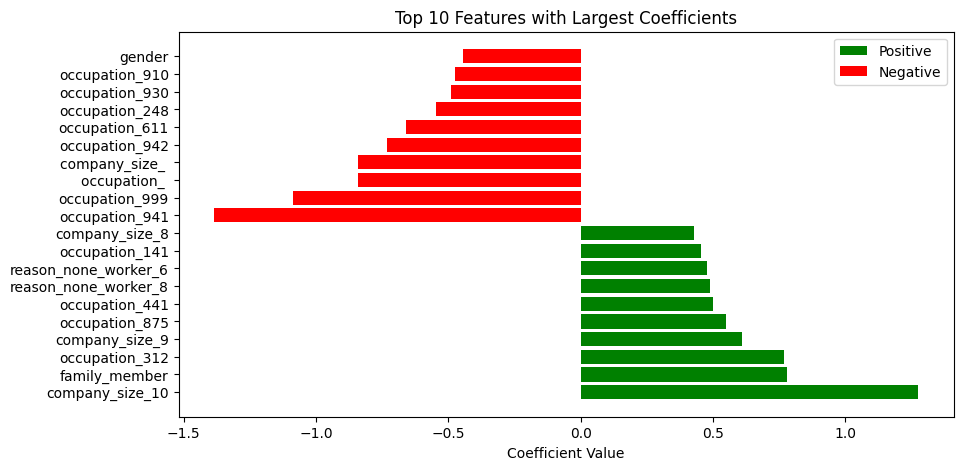

In [48]:

# Plot top 10 positive and negative coefficients
top_positive = positive_features.head(10)
top_negative = negative_features.head(10)
 
plt.figure(figsize=(10, 5))
plt.barh(top_positive['Feature'], top_positive['Coefficient'], color='green', label='Positive')
plt.barh(top_negative['Feature'], top_negative['Coefficient'], color='red', label='Negative')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Features with Largest Coefficients')
plt.legend()
plt.show()


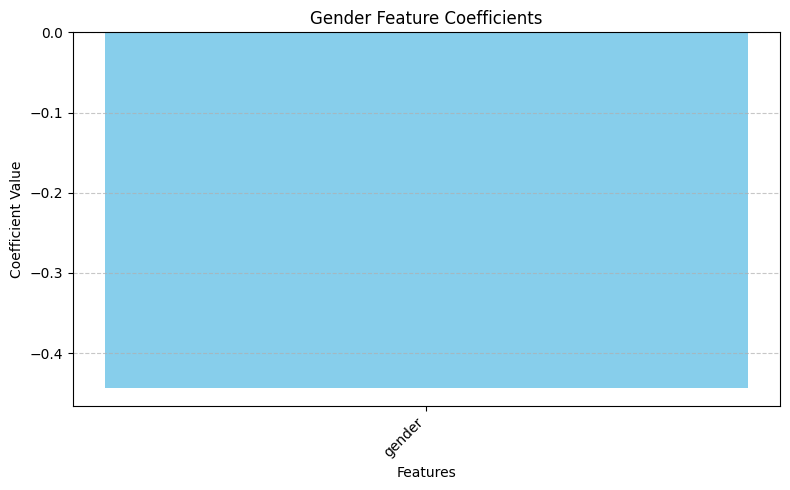

In [49]:
# Filter for gender coefficients
gender_coefficients = coeff_df[coeff_df['Feature'].str.contains('gender')]

# Extract features and their coefficients
features = gender_coefficients['Feature']
coefficients = gender_coefficients['Coefficient']

# Plotting
plt.figure(figsize=(8, 5))  # Define figure size
plt.bar(features, coefficients, color='skyblue')
plt.title('Gender Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
